In [5]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt  
from tqdm import tqdm
from pathlib import Path

In [6]:
cur_path = Path('.')

In [7]:
data_path = 'labelled/image'
label_path = 'labelled/label'  

In [8]:
images_list = list( filter(  lambda x: x.endswith('.nii.gz') , os.listdir(data_path) ) )
images_list.sort()

In [9]:
labels_list = list( filter(  lambda x: x.endswith('.nii.gz') , os.listdir(label_path) ) )
labels_list.sort()

In [10]:
for image in images_list:
    
#     print(image)
    src_path = cur_path / 'labelled' / 'image' / image
#     print(src_path)
#     print(image.split('.')[0])
    dst_path = cur_path / 'labelled' / 'image' / image.split('.')[0]
#     print(dst_path)
    dst_path.mkdir(parents=True, exist_ok=True)
    sitkImage = sitk.ReadImage(str(src_path.absolute())) # 读取其中一个volume数据
    slices = sitk.GetArrayFromImage(sitkImage) # 提取数据中心的array

    for i, slice_ in enumerate(tqdm(slices, desc=f'{image}')):
        dst_path_0 = dst_path / (image.split('.')[0]+f'_{i}.png')
#         print(dst_path_0)
        plt.imsave(str(dst_path_0.absolute()), slice_, cmap='gray')

#      break

Teeth_0012_0000.nii.gz: 100%|█████████████| 200/200 [00:00<00:00, 432848.71it/s]


In [11]:
for image in labels_list:
    
    src_path = cur_path / 'labelled' / 'label' / image
    
    dst_path = cur_path / 'labelled' / 'label' / image.split('.')[0]

    dst_path.mkdir(parents=True, exist_ok=True)
    sitkImage = sitk.ReadImage(str(src_path.absolute())) 
    slices = sitk.GetArrayFromImage(sitkImage) 

    for i, slice_ in enumerate(tqdm(slices, desc=f'{image}')):
        dst_path_0 = dst_path / (image.split('.')[0]+f'_{i}.png')

        plt.imsave(str(dst_path_0.absolute()), slice_, cmap='gray')


Teeth_0012_0000.nii.gz: 100%|█████████████| 200/200 [00:00<00:00, 418175.87it/s]


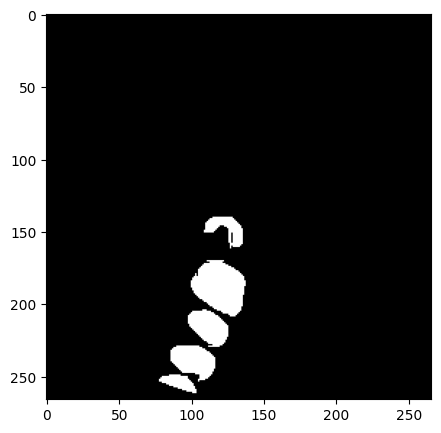

In [12]:
NifitmPath = 'labelled/label/Teeth_0001_0000.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

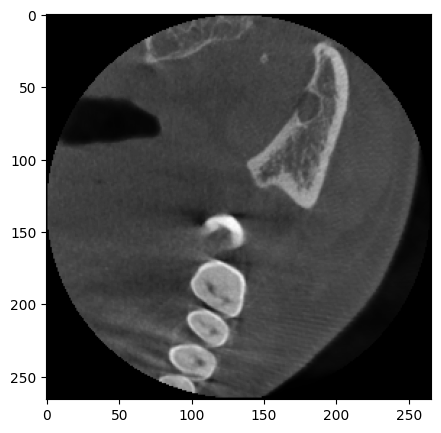

In [13]:
NifitmPath = 'labelled/image/Teeth_0001_0000.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()